## Image Segmentation

- Input dari 'data/processed/enhanced'
- Output enhancement disimpan di 'data/processed/segmented'

### Proses segmentation:

Enhanced Image -> Color Thresholded -> Noise Cleaned (with morphological process) -> Segmented

In [1]:
# Import dependencies
import kagglehub
import shutil
import os

import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import filters, measure, morphology

categories = [
    'bacterial_leaf_blight', 'brown_spot', 'healthy',
    'leaf_blast', 'leaf_scald', 'narrow_brown_spot'
]

d:\Files from Programs\VSCode\Kuliah\Semester 3\PCD\rice-leaf-disease-ml\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


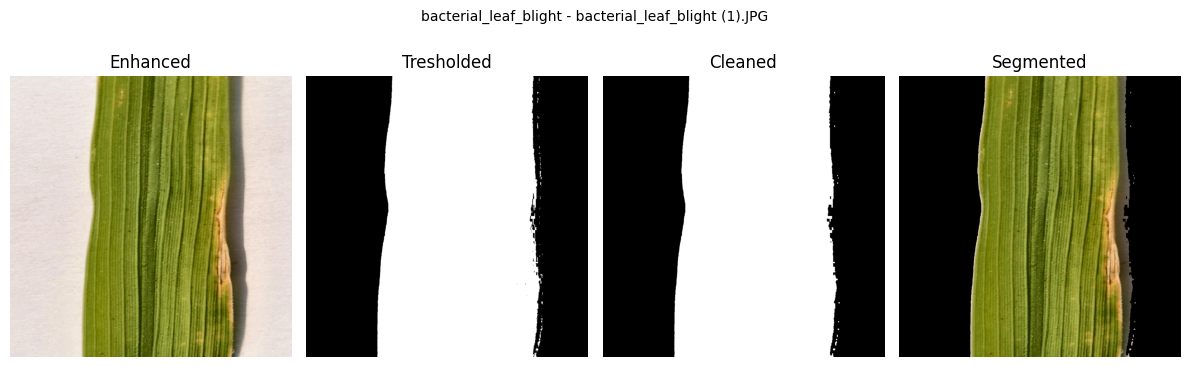

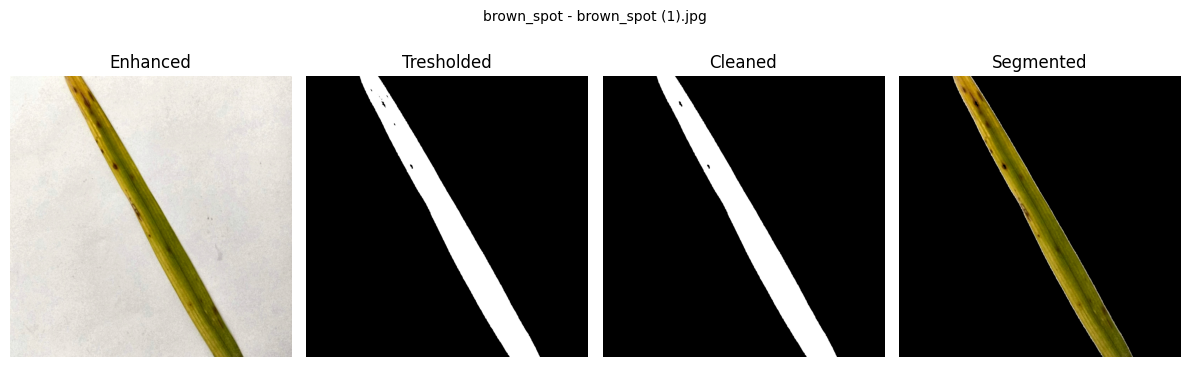

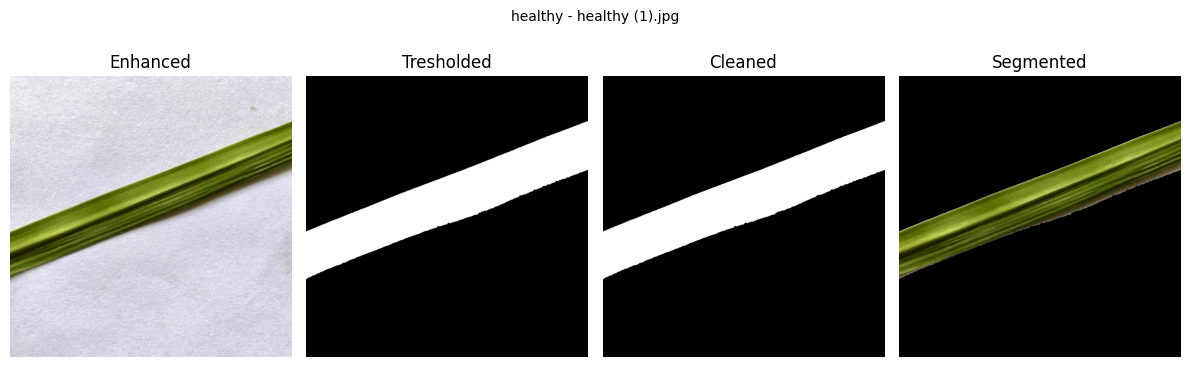

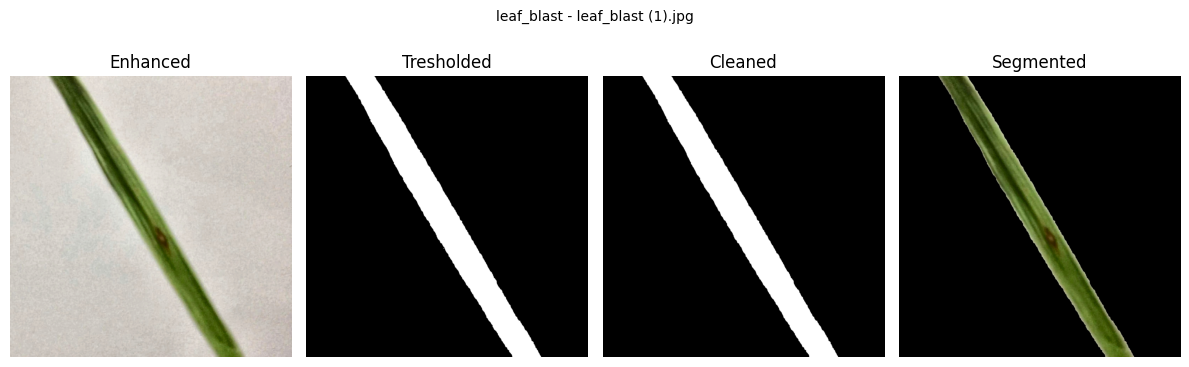

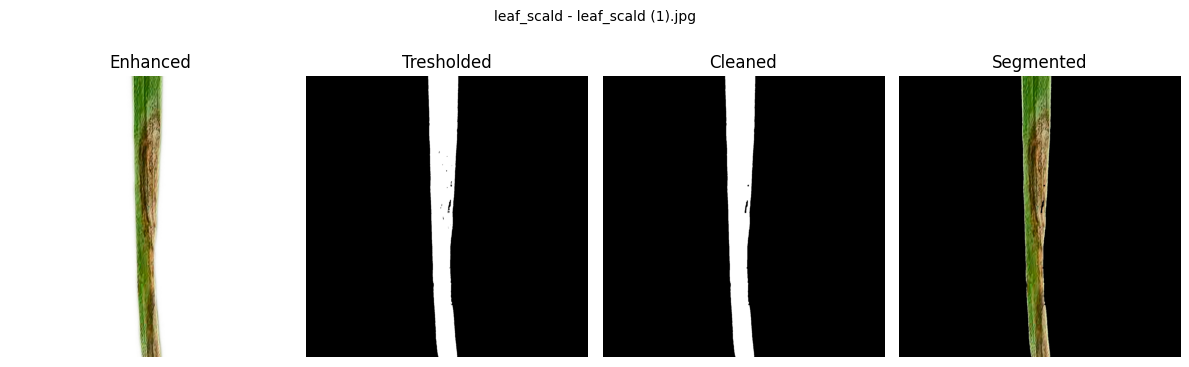

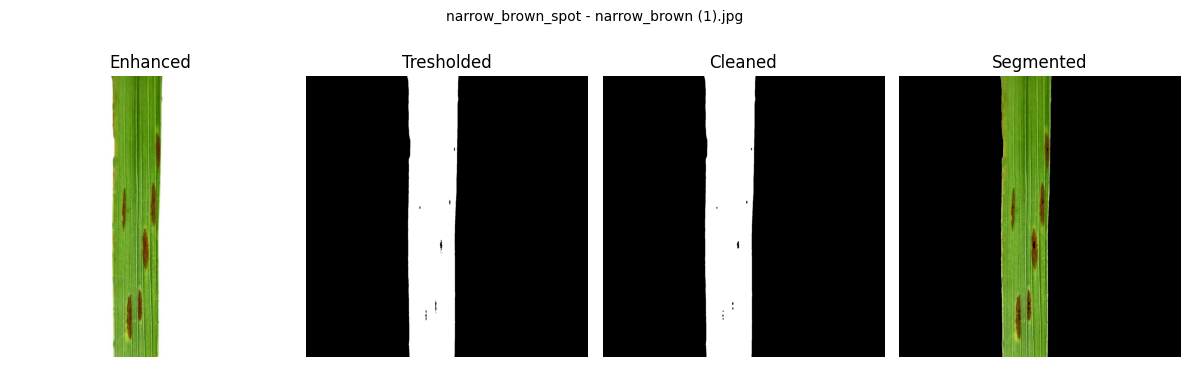

In [5]:
# IMAGE SEGMENTATION

for category in categories:
    input_dir = os.path.join('../data/processed/enhanced', category)
    output_dir = os.path.join('../data/processed/segmented', category)
    os.makedirs(output_dir, exist_ok=True)

    files = [f for f in os.listdir(input_dir)]
    files.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))  # urutin nomer

    for i, file in enumerate(files):
        img_path = os.path.join(input_dir, file)

        # 1. Raw Image
        img = cv2.imread(img_path)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # 2. Color tresholding (green - brown)
        lower = np.array([15, 40, 20])
        upper = np.array([90, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)

        # 3. Noise cleaning
        kernel = np.ones((5,5), np.uint8)
        mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)

        # 4. Segmentation with mask
        segmented = cv2.bitwise_and(img, img, mask=mask_cleaned)


        # Save gambar
        output_file = os.path.join(output_dir, file)
        cv2.imwrite(output_file, segmented)

        # Preview hasil

        preview_limit = 1 # limit preview
        if i < preview_limit:
            enhanced = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            segmented = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)
            titles = ['Enhanced', 'Tresholded', 'Cleaned', 'Segmented']
            images = [enhanced, mask, mask_cleaned, segmented]

            plt.figure(figsize=(12, 4))
            for i in range(len(titles)):
                plt.subplot(1, len(titles), i + 1)
                plt.imshow(images[i], cmap='gray' if i > 0 else None)
                plt.title(titles[i])
                plt.axis('off')
            plt.suptitle(f"{category} - {file}", fontsize=10)
            plt.tight_layout()
            plt.show()